In [146]:
#import necessary libaries
!pip install plotly
!pip install matplotlib
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


In [147]:
import numpy as np
import pandas as pd
#load dataset Crop_recommendation.csv with panda 
data=pd.read_csv("E:\cropsdjango\cropsrecommendation\cropsrecommendation\Crop_recommendation.csv")

In [148]:
#check top5 values of dataset
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [149]:
#check bottom5 values of dataset
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [150]:
#check number of rows and columns in dataset
data.shape


(2200, 8)

In [151]:
#check columns name and datatype
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [152]:
data.label.unique

<bound method Series.unique of 0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object>

In [153]:
#check duplicate values in dataset
data.duplicated().sum()


0

In [154]:
#check null values in dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [155]:
#describe dataset with count,mean and std
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [156]:
#check information of dataset with nullcolum,datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [157]:
#check non-unique values in columns
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [158]:
#show unique values of colum label
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [159]:
#show count of label unique values
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [160]:
#create pivot table
crop_sum=pd.pivot_table(data,index=['label'],aggfunc="mean")
crop_sum

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [161]:
#use to drop missing and not a number values
data.dropna()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [162]:
#show outlier every columns
figure=px.box(data,y="N",points="all")

figure.show()
figure1=px.box(data,y="P",points="all")
figure1.show()
figure2=px.box(data,y="K",points="all")
figure2.show()
figure3=px.box(data,y="humidity",points="all")
figure3.show()
figure4=px.box(data,y="temperature",points="all")
figure4.show()
figure5=px.box(data,y="ph",points="all")
figure5.show()
figure6=px.box(data,y="rainfall",points="all")
figure6.show()

In [163]:
# Outlier removal using the IQR rule
df=data
#Humidity

Q1 = df['humidity'].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['humidity'] >= Q1 - 1.5*IQR) & (df['humidity'] <= Q3 + 1.5*IQR)]
# Rainfall
Q1 = df['rainfall'].quantile(0.25)
Q3 = df['rainfall'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['rainfall'] >= Q1 - 1.5*IQR) & (df['rainfall'] <= Q3 + 1.5*IQR)]

# Temperature
Q1 = df['temperature'].quantile(0.25)
Q3 = df['temperature'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['temperature'] >= Q1 - 1.5*IQR) & (df['temperature'] <= Q3 + 1.5*IQR)]

# pH
Q1 = df['ph'].quantile(0.25)
Q3 = df['ph'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['ph'] >= Q1 - 1.5*IQR) & (df['ph'] <= Q3 + 1.5*IQR)]

# N
Q1 = df['N'].quantile(0.25)
Q3 = df['N'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['N'] >= Q1 - 1.5*IQR) & (df['N'] <= Q3 + 1.5*IQR)]

# P
Q1 = df['P'].quantile(0.25)
Q3 = df['P'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['P'] >= Q1 - 1.5*IQR) & (df['P'] <= Q3 + 1.5*IQR)]

# K 
Q1 = df['K'].quantile(0.25)
Q3 = df['K'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['K'] >= Q1 - 1.5*IQR) & (df['K'] <= Q3 + 1.5*IQR)]

In [164]:
#lets check dataset size after removing outliers
df.shape



(1756, 8)

In [165]:
import pickle

In [166]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=100, batch_size=32):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.classes = None
        
    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        self.weights = np.zeros((len(self.classes), n_features))
        self.bias = np.zeros(len(self.classes))
        for i, c in enumerate(self.classes):
            y_binary = np.where(y == c, 1, -1)
            w = np.zeros(n_features)
            b = 0
            for _ in range(self.n_iters):
                indices = np.random.choice(n_samples, self.batch_size, replace=False)
                X_batch = X[indices]
                y_batch = y_binary[indices]
                scores = np.dot(X_batch, w) - b
                margins = y_batch * scores
                misclassified = margins < 1
                grad_w = self.lambda_param * w - np.dot(X_batch.T, y_batch * misclassified) / self.batch_size
                grad_b = -np.sum(y_batch * misclassified) / self.batch_size
                w -= self.lr * grad_w
                b -= self.lr * grad_b
            self.weights[i] = w
            self.bias[i] = b
            
    def predict(self, X):
        output = np.dot(X, self.weights.T) - self.bias
        return self.classes[np.argmax(output, axis=1)]

In [167]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        




class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions.T
    

In [168]:
  def calculate_accuracy(y_true, y_pred):
        # Count the number of correct predictions
        correct = 0
        for i in range(len(y_true)):
            if y_true[i] == y_pred[i]:
                correct += 1
    # Calculate the accuracy as a percentage
        accuracy = (correct / len(y_true)) * 100
        return accuracy


In [169]:
import matplotlib.pyplot as plt

In [170]:
df.shape

(1756, 8)

In [171]:
data.shape

(2200, 8)

In [172]:
 X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [173]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000,1756.000000
mean,54.314920,44.567198,31.176538,25.923566,70.658360,6.469755,98.402775
std,38.600214,22.595553,14.842905,4.116578,21.286192,0.682124,48.744447
min,0.000000,5.000000,5.000000,14.780030,15.755940,4.523636,20.211267
25%,21.750000,25.000000,19.000000,23.510560,59.237124,6.018447,58.950809
50%,39.000000,45.000000,26.000000,26.010021,77.124650,6.456405,94.187313
75%,90.000000,62.000000,43.000000,28.618342,88.443491,6.924721,123.186005
max,140.000000,95.000000,82.000000,37.131650,99.981876,8.340398,215.919505


In [174]:
print(X.shape)

(1756, 7)


In [175]:
print(y.shape)

(1756,)


In [176]:
from sklearn.preprocessing import LabelEncoder

In [177]:
print(X.shape)

(1756, 7)


In [178]:
print(y.shape)

(1756,)


In [179]:
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y = le.fit_transform(y)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=40)

In [181]:
print(X_test.size)

6146


In [182]:
print(y_test.size)

878


In [183]:
svm_model = SVM()

In [184]:
svm_model.fit(X_train, y_train)

In [185]:
svm_pred1 = svm_model.predict(X_test)


In [186]:
svm_acc = calculate_accuracy(y_test, svm_pred1)
print(svm_acc)

41.00227790432802


In [187]:
with open('svmmodel.pkl', 'wb') as f:
    pickle.dump(svm_model, f)


In [237]:
rf = RandomForest(n_trees=10, max_depth=5, min_samples_split=2)
rf.fit(X_train, y_train)
rf_pred1 = rf.predict(X_test)
rf_acc = calculate_accuracy(y_test, rf_pred1)
print(rf_acc)
with open('rfmodel.pkl', 'wb') as f:
    pickle.dump(rf, f)



93.75


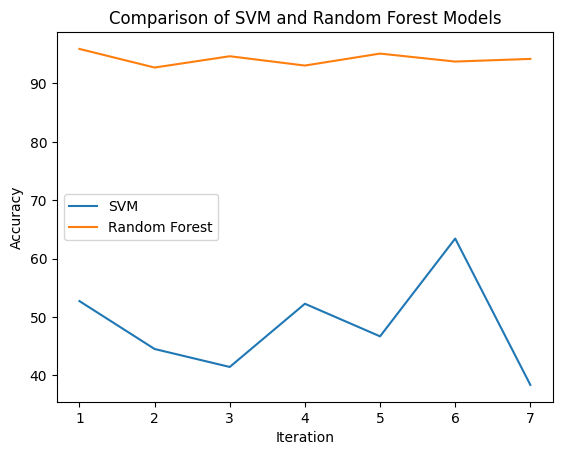

In [189]:
svm_acc = []
for i in range(7):
    svm_model = SVM()
    svm_model.fit(X_train, y_train)
    svm_pred = svm_model.predict(X_test)
    svm_acc.append(calculate_accuracy(y_test, svm_pred))

# Train the Random Forest model on the training set
rf_acc = []
for i in range(7):
    
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_acc.append(calculate_accuracy(y_test, rf_pred))

# Plot the accuracy of both models
plt.plot(range(1, 8), svm_acc, label='SVM')
plt.plot(range(1, 8), rf_acc, label='Random Forest')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM and Random Forest Models')
plt.legend()
plt.show()

In [190]:


true_indices = np.where(svm_pred1 == 1)[0]

# print the features of data points where SVM predicted true
for i in true_indices:
    print(f"Features of data point {i}: {X[i]}")

Features of data point 1: [ 93.          56.          36.          24.01497622  82.05687182
   6.98435366 185.2773389 ]
Features of data point 4: [ 89.          45.          36.          21.32504158  80.47476396
   6.44247537 185.4974732 ]
Features of data point 5: [ 67.          59.          41.          21.94766735  80.97384195
   6.01263259 213.3560921 ]
Features of data point 6: [ 84.          51.          35.          22.30157427  80.64416466
   6.0433049  197.9791215 ]
Features of data point 8: [ 95.          55.          42.          26.79533926  82.1480873
   5.95066056 193.3473987 ]
Features of data point 11: [ 91.          35.          38.          24.8972823   80.52586088
   6.13428721 183.6793207 ]
Features of data point 12: [ 76.          49.          42.          24.958779    84.47963372
   5.20637315 196.9560008 ]
Features of data point 15: [ 93.          56.          42.          23.85724032  82.22572988
   7.3827626  195.0948311 ]
Features of data point 16: [ 71.      

Features of data point 391: [22.         44.         24.         24.30935081 56.32938343  6.03044729
 58.99536268]
Features of data point 392: [17.         43.         22.         30.06142622 45.90067655  5.49834081
 41.0550915 ]
Features of data point 394: [ 7.         56.         23.         26.33908791 40.00933429  5.54521923
 55.50429227]
Features of data point 401: [23.         35.         18.         26.4908332  47.36534833  5.41449278
 36.99362831]
Features of data point 402: [ 9.         60.         23.         31.96987867 57.17377029  6.27600434
 64.25520357]
Features of data point 405: [32.         41.         16.         28.63618921 61.39451307  7.70228724
 68.54877876]
Features of data point 408: [21.         39.         20.         27.06179658 52.3003173   7.38800748
 60.74583498]
Features of data point 411: [22.         36.         16.         30.58139475 50.77148138  8.18422855
 64.58559639]
Features of data point 412: [11.         41.         19.         26.85911286 41.

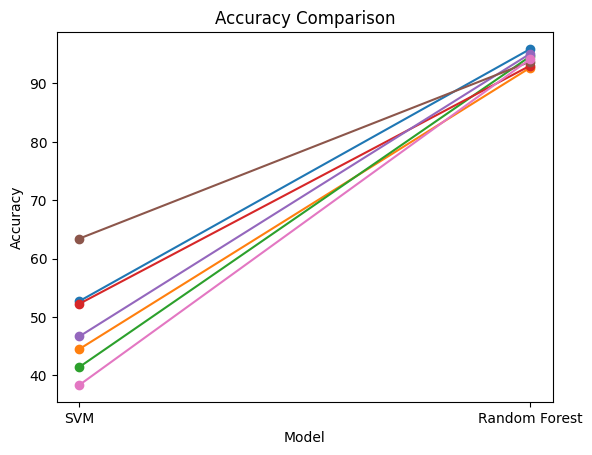

TypeError: cannot pickle 'module' object

In [191]:
models = ['SVM', 'Random Forest']
accuracy = [svm_acc, rf_acc]
plt.plot(models, accuracy, marker='o')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
with open('svmmodel.pkl', 'wb') as f:
    pickle.dump(plt, f)


In [ ]:
print(X_test.shape)
print (y_test.shape)
print(svm_pred.shape)

In [ ]:
models = ['SVM', 'Random Forest']
accuracy = [svm_acc, rf_acc]
plt.plot(models, accuracy, marker='o')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()
with open('acccomp.pkl', 'wb') as f:
    pickle.dump(plt, f)


In [ ]:
le.inverse_transform(rf_pred)

In [ ]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

data=pd.read_csv("E:\cropsdjango\cropsrecommendation\cropsrecommendation\Crop_recommendation.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
 
# Generate a random classification dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2)
rf.fit(X_train, y_train)
z_pred=rf.predict(X_train)
y_pred = rf.predict(X_test)
print("Accuracy random forest",accuracy_score(y_train,y_pred))
print("Accuracy random forest",accuracy_score(y_test,y_pred))



# Define a list of SVM kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Loop through each kernel and fit an SVM model using cross-validation
for kernel in kernels:
    svm = SVC(kernel=kernel)
    scores = cross_val_score(svm, X, y, cv=5)
    accuracy = scores.mean()
    print(f"Accuracy with {kernel} kernel: {accuracy:.2f}")


E:\cropsdjango\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

E:\cropsdjango\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

E:\cropsdjango\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



svm_test_accuracy 0.6376146788990825


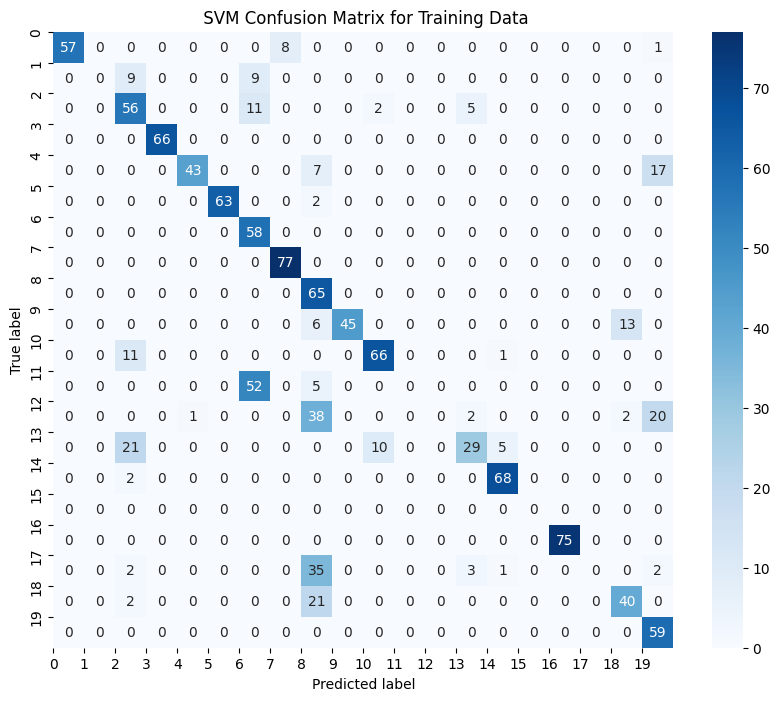

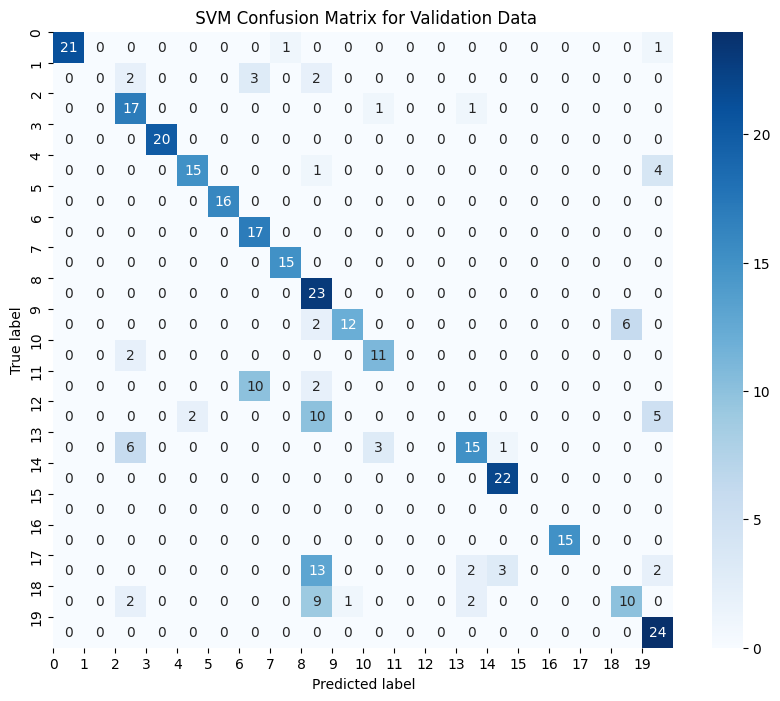

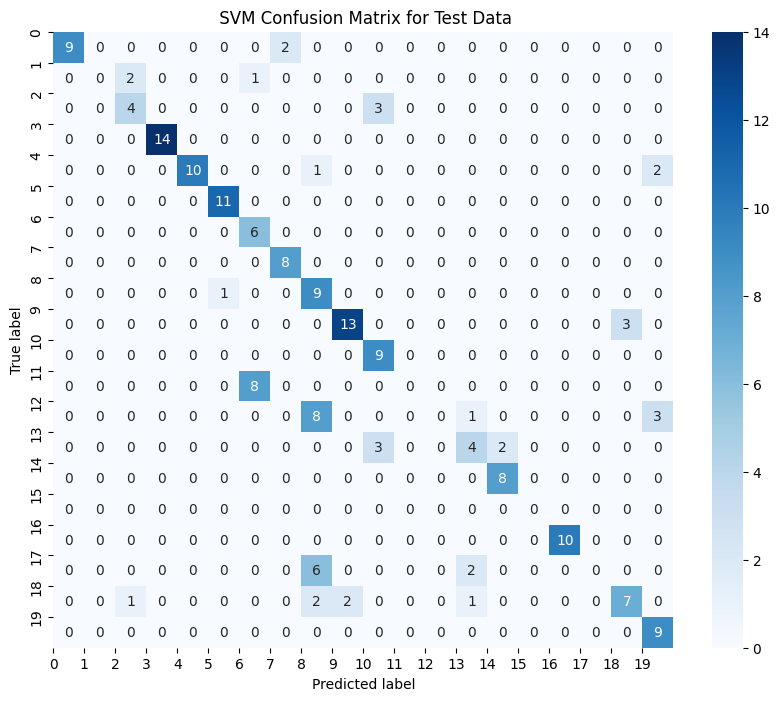

In [231]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('Crop_recommendation.csv')

# Split the data into features (X) and labels (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and the remaining data (test + validation)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the remaining data (test + validation) into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

def plot_confusion_matrix(y_true, y_pred, labels, data_type):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks(ticks=np.arange(len(labels)), labels=labels)
    plt.yticks(ticks=np.arange(len(labels)), labels=labels)
    plt.title(f' SVM Confusion Matrix for {data_type} Data')
    plt.show()


# Train SVM classifier
svm_classifier = SVM()
svm_classifier.fit(X_trainval, y_trainval)

# Make predictions on the training set
svm_train_predictions = svm_classifier.predict(X_trainval)

# Calculate accuracy, precision, recall, and F1 score for the training set
svm_train_accuracy = accuracy_score(y_trainval, svm_train_predictions)
svm_train_precision = precision_score(y_trainval, svm_train_predictions, average='weighted')
svm_train_recall = recall_score(y_trainval, svm_train_predictions, average='weighted')
svm_train_f1_score = f1_score(y_trainval, svm_train_predictions, average='weighted')

# Save the metrics using pickle
metrics = {
    'svm_train_accuracy': svm_train_accuracy,
    'svm_train_precision': svm_train_precision,
    'svm_train_recall': svm_train_recall,
    'svm_train_f1_score': svm_train_f1_score
}

with open('metricstr.pkl', 'wb') as file:
    pickle.dump(metrics, file)

# Make predictions on the validation set
svm_val_predictions = svm_classifier.predict(X_val)

# Calculate accuracy, precision, recall, and F1 score for the validation set
svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
svm_val_precision = precision_score(y_val, svm_val_predictions, average='weighted')
svm_val_recall = recall_score(y_val, svm_val_predictions, average='weighted')
svm_val_f1_score = f1_score(y_val, svm_val_predictions, average='weighted')

# Save the metrics using pickle
metrics = {
    'svm_val_accuracy': svm_val_accuracy,
    'svm_val_precision': svm_val_precision,
    'svm_val_recall': svm_val_recall,
    'svm_val_f1_score': svm_val_f1_score
}

with open('metrics.pkl', 'ab') as file:
    pickle.dump(metrics, file)

# Make predictions on the test set
svm_test_predictions = svm_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score for the test set
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
svm_test_precision = precision_score(y_test, svm_test_predictions, average='weighted')
svm_test_recall = recall_score(y_test, svm_test_predictions, average='weighted')
svm_test_f1_score = f1_score(y_test, svm_test_predictions, average='weighted')
print("svm_test_accuracy",svm_test_accuracy)

# Save the metrics using pickle
metrics = {
    'svm_test_accuracy': svm_test_accuracy,
    'svm_test_precision': svm_test_precision,
    'svm_test_recall': svm_test_recall,
    'svm_test_f1_score': svm_test_f1_score
}

with open('metricstest.pkl', 'ab') as file:
    pickle.dump(metrics, file)


plot_confusion_matrix(y_trainval, svm_train_predictions, labels, 'Training')



# Plot the confusion matrix for the validation set
plot_confusion_matrix(y_val, svm_val_predictions, labels, 'Validation')



# Plot the confusion matrix for the test set
plot_confusion_matrix(y_test, svm_test_predictions, labels, 'Test')



In [ ]:
data


In [ ]:
X_trainval

In [ ]:
X_Val

E:\cropsdjango\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Train Accuracy: 0.9991095280498664
Validation Accuracy: 0.9644128113879004
Test Accuracy: 0.9545454545454546
Train Precision: 0.998076923076923
Validation Precision: 0.9705058677655932
Test Precision: 0.9075776532835356
Train Recall: 0.9993243243243242
Validation Recall: 0.9506309479993691
Test Recall: 0.9169419471567304
Train F1-Score: 0.9986794717887155
Validation F1-Score: 0.95679831602598
Test F1-Score: 0.9091323490845846


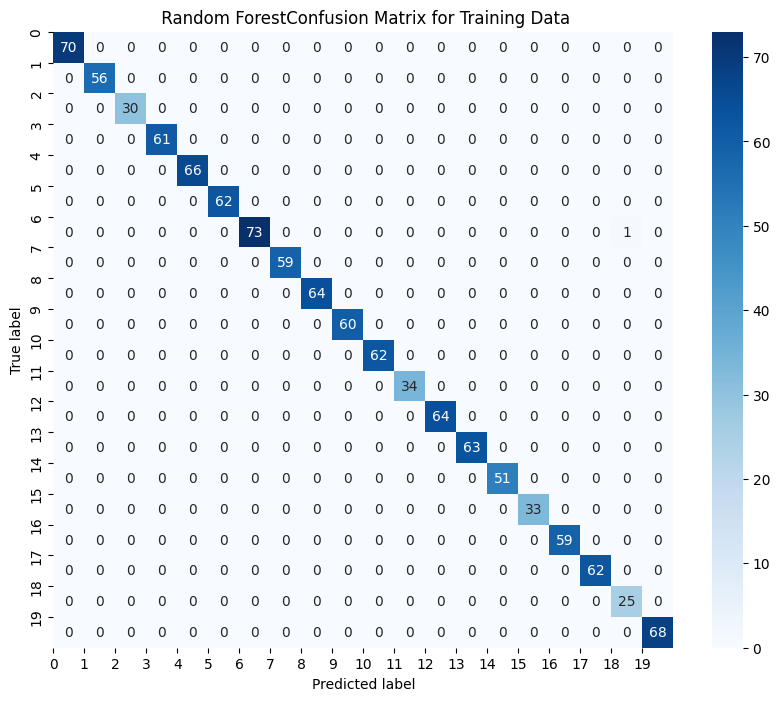

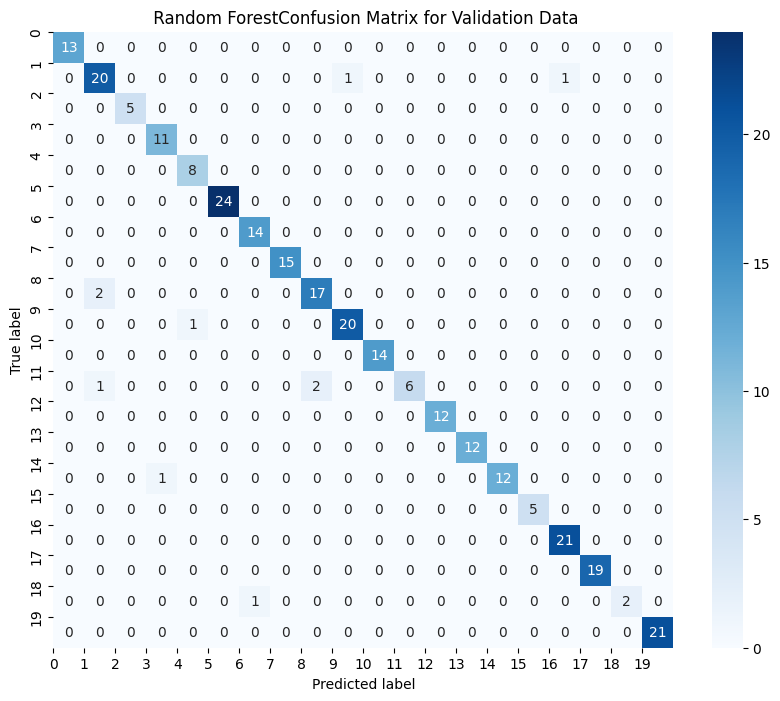

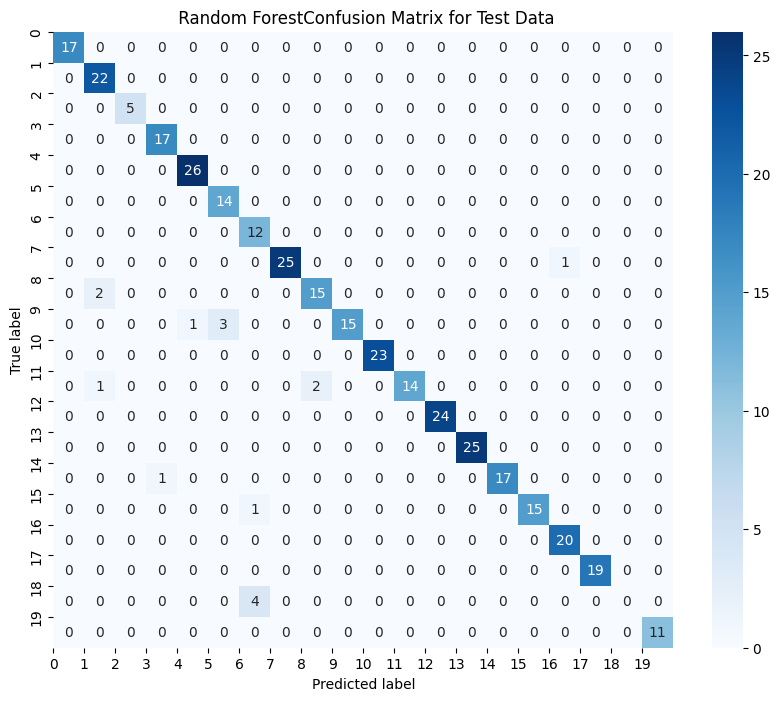

In [236]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, n_feats, replace=False)

        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feature, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold

    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions.T
def plot_confusion_matrix(y_true, y_pred, labels, data_type):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks(ticks=np.arange(len(labels)), labels=labels)
    plt.yticks(ticks=np.arange(len(labels)), labels=labels)
    plt.title(f' Random ForestConfusion Matrix for {data_type} Data')
    plt.show()






# Load the CSV file into a pandas DataFrame
data = pd.read_csv('Crop_recommendation.csv')
from sklearn.preprocessing import LabelEncoder

# Split the data into features (X) and labels (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
le = LabelEncoder()
y = le.fit_transform(y)
# Split your data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create an instance of RandomForest
rf = RandomForest(n_trees=10, max_depth=10, min_samples_split=2)

# Fit the RandomForest to the training data
rf.fit(X_train, y_train)

# Make predictions on the training, validation, and test data
train_predictions = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='macro')
train_f1 = f1_score(y_train, train_predictions, average='macro')
train_recall = recall_score(y_train, train_predictions, average='macro')
metrics = {
    'train_accuracy': train_accuracy,
    'train_precision': train_precision,
    'train_recall': train_recall,
    'train_f1_score': train_f1
}

with open('rfmetricstr.pkl', 'wb') as file:
    pickle.dump(metrics, file)
# Calculate accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
valid_predictions = rf.predict(X_valid)

valid_accuracy = accuracy_score(y_valid, valid_predictions)

valid_precision = precision_score(y_valid, valid_predictions, average='macro')
valid_f1 = f1_score(y_valid, valid_predictions, average='macro')

valid_recall = recall_score(y_valid, valid_predictions, average='macro')
metrics = {
    'valid_accuracy': valid_accuracy,
    'valid_precision': valid_precision,
    'valid_recall': valid_recall,
    'validf1_score': valid_f1
}
with open('rfmetricsva.pkl', 'wb') as file:
    pickle.dump(metrics, file)

test_predictions = rf.predict(X_test)


test_accuracy = accuracy_score(y_test, test_predictions)


test_precision = precision_score(y_test, test_predictions, average='macro')


test_recall = recall_score(y_test, test_predictions, average='macro')



test_f1 = f1_score(y_test, test_predictions, average='macro')
metrics = {
    'test_accuracy': test_accuracy,
    'test_precision': test_precision,
    'test_recall': test_recall,
    'test_f1_score': test_f1
}
with open('rfmetricstst.pkl', 'wb') as file:
    pickle.dump(metrics, file)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", valid_accuracy)
print("Test Accuracy:", test_accuracy)

print("Train Precision:", train_precision)
print("Validation Precision:", valid_precision)
print("Test Precision:", test_precision)

print("Train Recall:", train_recall)
print("Validation Recall:", valid_recall)
print("Test Recall:", test_recall)

print("Train F1-Score:", train_f1)
print("Validation F1-Score:", valid_f1)
print("Test F1-Score:", test_f1)

labels = np.unique(y_train)

# Plot the confusion matrix for the training set
# Plot the confusion matrix for the training set
plot_confusion_matrix(y_train, train_predictions, labels, 'Training')

# Plot the confusion matrix for the validation set
plot_confusion_matrix(y_valid, valid_predictions, labels, 'Validation')

# Plot the confusion matrix for the test set
plot_confusion_matrix(y_test, test_predictions, labels, 'Test')
